# Build model

In [1]:
import pandas as pd
from pycaret.regression import *

In [2]:
df = pd.read_csv("datasets/delaney_train.csv")
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,exp LogS
0,2.59540,167.850,0,0.000000,-2.180
1,2.37650,133.405,0,0.000000,-2.000
2,2.59380,167.850,1,0.000000,-1.740
3,2.02890,133.405,1,0.000000,-1.480
4,2.91890,187.375,1,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8,0.000000,1.144
1140,3.42130,286.114,2,0.333333,-4.925
1141,3.60960,308.333,4,0.695652,-3.893
1142,2.56214,354.815,3,0.521739,-3.790


In [3]:
model = setup(data=df,target="exp LogS",train_size=0.8)

,Description,Value
0,Session id,3055
1,Target,exp LogS
2,Target type,Regression
3,Original data shape,"(1144, 5)"
4,Transformed data shape,"(1144, 5)"
5,Transformed train set shape,"(915, 5)"
6,Transformed test set shape,"(229, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [4]:
best_model = compare_models(budget_time=10, errors="raise", exclude=["lightgbm"])
# exluding lightgbm because pycaret freezes compare_models on lightgbm

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.5362,0.5533,0.7416,0.8745,0.2095,0.6326,0.0480
rf,Random Forest Regressor,0.5539,0.5826,0.7594,0.8682,0.2104,0.6497,0.0730
gbr,Gradient Boosting Regressor,0.6014,0.6345,0.7930,0.8561,0.2273,0.6841,0.0280
ada,AdaBoost Regressor,0.7085,0.8297,0.9080,0.8121,0.2477,0.7959,0.0190
dt,Decision Tree Regressor,0.7011,0.9660,0.9737,0.7834,0.2609,0.8588,0.0070
lar,Least Angle Regression,0.7825,1.0465,1.0209,0.7606,0.2923,0.9055,0.0070
br,Bayesian Ridge,0.7833,1.0464,1.0209,0.7606,0.2922,0.9073,0.0070
ridge,Ridge Regression,0.7826,1.0464,1.0209,0.7606,0.2923,0.9058,0.0070
lr,Linear Regression,0.7825,1.0465,1.0209,0.7606,0.2923,0.9055,0.2600
huber,Huber Regressor,0.7804,1.0506,1.0228,0.7596,0.2907,0.8497,0.0130


In [5]:
model = create_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5446,0.5639,0.7509,0.8742,0.2246,2.3099
1,0.5600,0.5916,0.7691,0.8371,0.2213,0.5758
2,0.4845,0.4050,0.6364,0.8970,0.2033,0.2463
3,0.5268,0.5240,0.7239,0.8842,0.2031,0.2350
4,0.4649,0.4902,0.7001,0.8795,0.1648,0.2574
5,0.5577,0.6237,0.7897,0.8595,0.1755,0.3760
6,0.5131,0.4854,0.6967,0.8945,0.2001,0.6590
7,0.6118,0.6675,0.8170,0.8613,0.2459,0.7237
8,0.5164,0.4935,0.7025,0.8779,0.2178,0.2680


In [6]:
model = tune_model(model, n_iter =50, optimize = 'mae', choose_better=True)
# choose_better=True because tuning does not always improve the model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5530,0.5780,0.7603,0.8711,0.2322,2.1803
1,0.5552,0.6092,0.7805,0.8323,0.2323,0.5674
2,0.4998,0.3970,0.6301,0.8990,0.1888,0.3449
3,0.5814,0.5734,0.7572,0.8733,0.2003,0.2609
4,0.5672,0.6035,0.7769,0.8516,0.2036,0.3713
5,0.5690,0.6902,0.8308,0.8445,0.1893,0.5055
6,0.6048,0.5847,0.7647,0.8729,0.2257,0.3886
7,0.6059,0.6061,0.7785,0.8741,0.2332,0.6138
8,0.4990,0.4327,0.6578,0.8930,0.1807,0.2695


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [7]:
predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.4785,0.4384,0.6621,0.8936,0.1959,0.6170


,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,exp LogS,prediction_label
750,0.81540,102.133003,3,0.000000,-1.010,-0.697830
13,4.73660,393.697998,0,0.600000,-6.980,-6.289720
495,2.34000,112.558998,0,0.857143,-2.380,-2.449797
696,2.79890,232.205002,1,0.375000,-3.320,-3.430000
1016,2.24112,245.281998,2,0.611111,-2.090,-3.264890
...,...,...,...,...,...,...
837,2.44210,228.679001,2,0.400000,-2.564,-2.829340
828,2.58660,98.189003,0,0.000000,-3.850,-3.456600
616,3.43020,169.227005,2,0.923077,-3.504,-4.284027
324,1.55320,180.162994,2,0.461538,-2.692,-2.446730


In [8]:
final_model = finalize_model(model)
predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0474,0.0176,0.1328,0.9957,0.0353,0.0247


,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,exp LogS,prediction_label
750,0.81540,102.133003,3,0.000000,-1.010,-1.010
13,4.73660,393.697998,0,0.600000,-6.980,-6.980
495,2.34000,112.558998,0,0.857143,-2.380,-2.380
696,2.79890,232.205002,1,0.375000,-3.320,-3.375
1016,2.24112,245.281998,2,0.611111,-2.090,-2.090
...,...,...,...,...,...,...
837,2.44210,228.679001,2,0.400000,-2.564,-2.564
828,2.58660,98.189003,0,0.000000,-3.850,-3.850
616,3.43020,169.227005,2,0.923077,-3.504,-3.504
324,1.55320,180.162994,2,0.461538,-2.692,-2.692


In [9]:
save_model(final_model,"WaterSoulubility_03_01_2024_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['MolLogP', 'MolWt',
                                              'NumRotatableBonds',
                                              'AromaticProportion'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('actual_estimator',
                  ExtraTreesRegressor(n_jobs=-1, random_state=3055))]),
 'WaterSoulubility_03_01_2024_model.pkl')

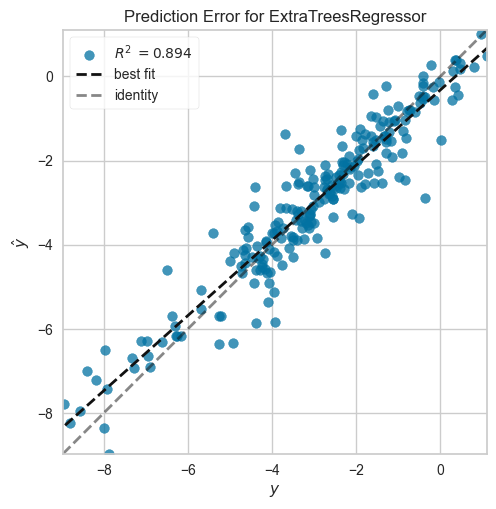

ModuleNotFoundError: 
'shap' is a soft dependency and not included in the pycaret installation. Please run: `pip install shap` to install.
Alternately, you can install this by running `pip install pycaret[analysis]`

In [10]:
plot_model(model, plot = 'error')

interpret_model(model, plot = 'correlation')

# test model

In [11]:
model = load_model("WaterSoulubility_03_01_2024_model")

Transformation Pipeline and Model Successfully Loaded


In [12]:
from chem_util import descriptors_from_smiles
smiles = [
  "C1CCCCC1",
  "CC(C)Cc1ccc(cc1)C(C)C(=O)O", # ibuprofen
]
x = descriptors_from_smiles(smiles)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.3406,84.162,0,0.0
1,3.0732,206.285,4,0.4


In [13]:
model.predict(x)

array([-3.0999999 , -3.23036333])